Comparisons among clustering algorithms
=====================

In order to gain an overview of the performance characteristics of clustering algorithms in general, we will compare a number of the more popular clustering algorithms as found in scikit-learn. Since we recognise that implementation can have a significant effect on runtime performance, our goal here is merely to provide an sample of the performance space rather than direct comparisons to specific algorithms. Our choice of scikit-learn is to provide a number of techniques that all rest on a common implementation foundation (the same foundation as our scikit-learn compatible HDBSCAN* implementation).

For the initial comparison we consider the following algorithms as implemented in sklearn: Affinity Propagation, Birch, Complete Linkage, DBSCAN, KMeans, Mean Shift, Spectral Clustering, and Ward Clustering. We compare these with our HDBSCAN\* implementation.

Since this is a broad comparison of overall performance characteristics each algorithm will be initialized with default scikit-learn parameters. In later sections, with more detailed comparisons, we will more carefully consider the impact of clustering algorithm parameters on performance.

In [1]:
import numpy as np
import sklearn.cluster
import hdbscan
from sklearn.datasets import make_blobs
import time
import pandas as pd

In [2]:
def benchmark_algorithm(dataset_sizes, cluster_function, function_args=[], function_kwds={},
                        dataset_dimension=10, dataset_n_clusters=10, max_time=120, sample_size=5):
    
    # Initialize the result with NaNs so that any unfilled entries 
    # will be considered NULL when we convert to a pandas dataframe at the end
    result = np.nan * np.ones((len(dataset_sizes), sample_size))
    for index, size in enumerate(dataset_sizes):
        for s in range(sample_size):
            # Use sklearns make_blobs to generate a random dataset with specified size
            # dimension and number of clusters
            data, labels = make_blobs(n_samples=size, 
                                                       n_features=dataset_dimension, 
                                                       centers=dataset_n_clusters)
            
            # Start the clustering with a timer
            start_time = time.time()
            cluster_function(data, *function_args, **function_kwds)
            time_taken = time.time() - start_time
            
            # If we are taking more than max_time then abort -- we don't
            # want to spend excessive time on slow algorithms
            if time_taken > max_time:
                result[index, s] = time_taken
                return pd.DataFrame(np.vstack([dataset_sizes.repeat(sample_size), 
                                               result.flatten()]).T, columns=['x','y'])
            else:
                result[index, s] = time_taken
        
    # Return the result as a dataframe for easier handling with seaborn afterwards
    return pd.DataFrame(np.vstack([dataset_sizes.repeat(sample_size), 
                                   result.flatten()]).T, columns=['x','y'])

We will generate the data for each clustering algorithms performance in a separate cell block to ensure we have no single cell that has an excessive runtime. For the initial experiment we will consider data set varying sizes up to 24000 data points.

In [3]:
dataset_sizes = np.hstack([np.arange(1, 6) * 500, 
                           np.arange(3,7) * 1000, 
                           np.arange(4,13) * 2000])

Affinity Propagation
--------------------

In [4]:
clusterer = sklearn.cluster.AffinityPropagation()
affinity_prop = benchmark_algorithm(dataset_sizes, clusterer.fit)
affinity_prop.head()

,x,y
0,500.0,0.760354
1,500.0,0.598962
2,500.0,0.670290
3,500.0,0.299528
4,500.0,0.253032


Birch
-----

In [5]:
clusterer = sklearn.cluster.Birch()
birch = benchmark_algorithm(dataset_sizes, clusterer.fit)
birch.head()

,x,y
0,500.0,0.030061
1,500.0,0.023916
2,500.0,0.023601
3,500.0,0.025415
4,500.0,0.023975


Complete Linkage
----------------

In [6]:
clusterer = sklearn.cluster.AgglomerativeClustering(linkage='complete')
complete_linkage = benchmark_algorithm(dataset_sizes, clusterer.fit)
complete_linkage.head()

,x,y
0,500.0,0.005816
1,500.0,0.005364
2,500.0,0.008793
3,500.0,0.006667
4,500.0,0.005081


DBSCAN
------

In [7]:
clusterer = sklearn.cluster.DBSCAN()
dbscan = benchmark_algorithm(dataset_sizes, clusterer.fit)
dbscan.head()

,x,y
0,500.0,0.005636
1,500.0,0.004835
2,500.0,0.005293
3,500.0,0.004537
4,500.0,0.004996


KMeans
------

In [8]:
clusterer = sklearn.cluster.KMeans()
kmeans = benchmark_algorithm(dataset_sizes, clusterer.fit)
kmeans.head()

,x,y
0,500.0,0.024504
1,500.0,0.016932
2,500.0,0.021669
3,500.0,0.025065
4,500.0,0.020709


Mean Shift
----------

In [9]:
clusterer = sklearn.cluster.MeanShift()
mean_shift = benchmark_algorithm(dataset_sizes, clusterer.fit)
mean_shift.head()

,x,y
0,500.0,0.987880
1,500.0,0.769285
2,500.0,0.930334
3,500.0,1.160555
4,500.0,0.565296


Spectral Clustering
-------------------

In [10]:
clusterer = sklearn.cluster.SpectralClustering()
spectral = benchmark_algorithm(dataset_sizes, clusterer.fit)
spectral.head()

,x,y
0,500.0,0.209134
1,500.0,0.167265
2,500.0,0.219728
3,500.0,0.166440
4,500.0,0.496761


Ward Clustering
---------------

In [11]:
clusterer = sklearn.cluster.AgglomerativeClustering(linkage='ward')
ward = benchmark_algorithm(dataset_sizes, clusterer.fit)
ward.head()

,x,y
0,500.0,0.008534
1,500.0,0.005650
2,500.0,0.005816
3,500.0,0.004904
4,500.0,0.004666


HDBSCAN
-------

In [12]:
clusterer = hdbscan.HDBSCAN()
hdbscan = benchmark_algorithm(dataset_sizes, clusterer.fit)
hdbscan.head()

,x,y
0,500.0,0.014202
1,500.0,0.010338
2,500.0,0.011024
3,500.0,0.010823
4,500.0,0.013542


In [15]:
affinity_prop.to_csv('affinity_prop_perf.csv')
birch.to_csv('birch_perf.csv')
complete_linkage.to_csv('complete_linkage_perf.csv')
dbscan.to_csv('dbscan_perf.csv')
kmeans.to_csv('kmeans_perf.csv')
mean_shift.to_csv('mean_shift_perf.csv')
spectral.to_csv('spectral_perf.csv')
ward.to_csv('ward_perf.csv')
hdbscan.to_csv('hdbscan_perf.csv')

Plotting Results
----------------

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
%matplotlib inline
sns.set_context('poster')
sns.set_palette('Paired', 10)
sns.set_color_codes()

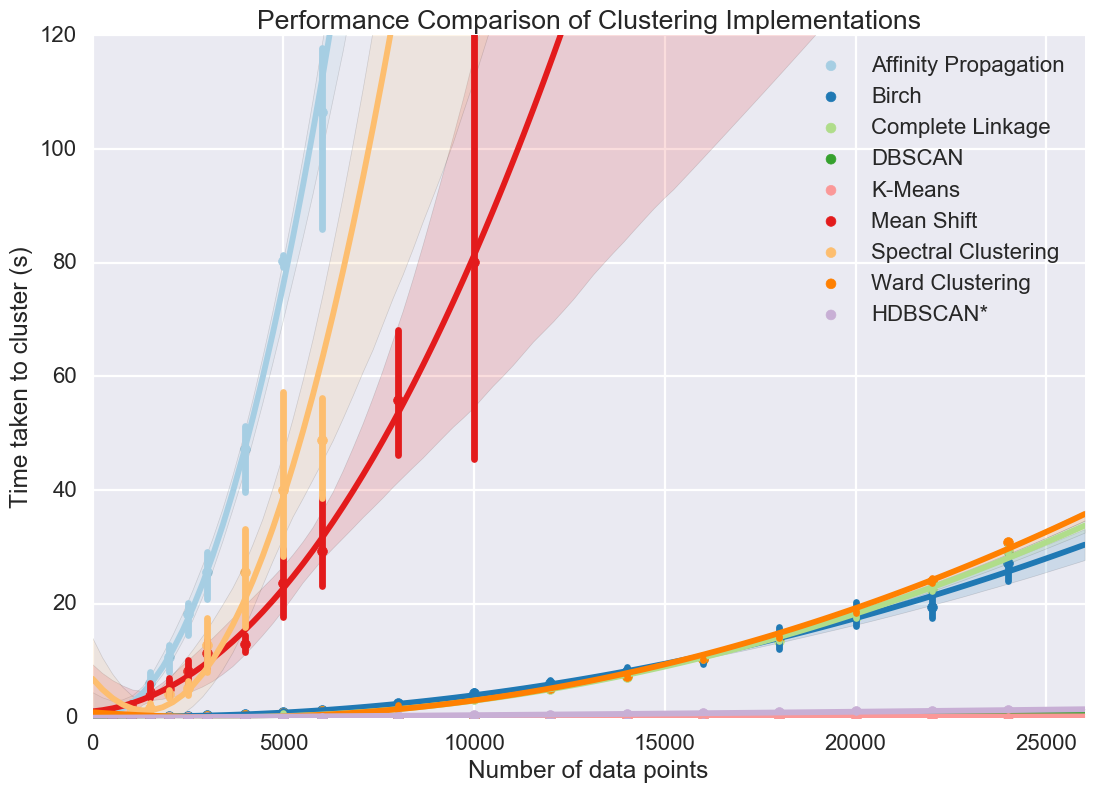

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.axis([0, 26000, 0, 120])
sns.regplot(x='x', y='y', 
            data=affinity_prop, 
            order=2, 
            label='Affinity Propagation', 
            x_estimator=np.mean,
            ax=ax)
sns.regplot(x='x', y='y', 
            data=birch, 
            order=2, 
            label='Birch', 
            x_estimator=np.mean,
            ax=ax)
sns.regplot(x='x', y='y', 
            data=complete_linkage, 
            order=2, 
            label='Complete Linkage', 
            x_estimator=np.mean,
            ax=ax)
sns.regplot(x='x', y='y', 
            data=dbscan, 
            order=2, 
            label='DBSCAN', 
            x_estimator=np.mean,
            ax=ax)
sns.regplot(x='x', y='y', 
            data=kmeans, 
            order=2, 
            label='K-Means', 
            x_estimator=np.mean,
            ax=ax)
sns.regplot(x='x', y='y', 
            data=mean_shift, 
            order=2, 
            label='Mean Shift', 
            x_estimator=np.mean,
            ax=ax)
sns.regplot(x='x', y='y', 
            data=spectral, 
            order=2, 
            label='Spectral Clustering', 
            x_estimator=np.mean,
            ax=ax)
sns.regplot(x='x', y='y', 
            data=ward, 
            order=2, 
            label='Ward Clustering', 
            x_estimator=np.mean,
            ax=ax)
sns.regplot(x='x', y='y', 
            data=hdbscan, 
            order=2, 
            label='HDBSCAN*', 
            x_estimator=np.mean,
            ax=ax)
ax.set_xlabel('Number of data points')
ax.set_ylabel('Time taken to cluster (s)')
plt.title('Performance Comparison of Clustering Implementations')
plt.legend()
plt.savefig('performance_all_sklearn_implementations.png')

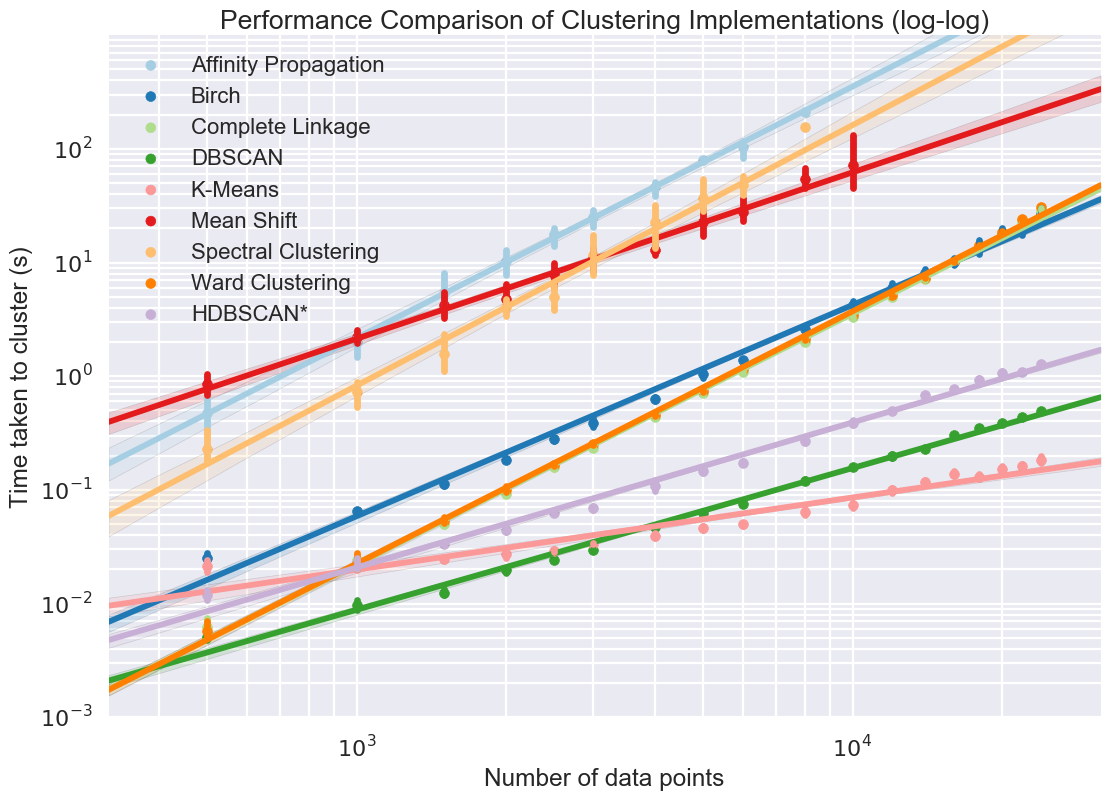

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.axis([2.5, 4.5, -3.0, 3])
xticks = np.log10(np.hstack([
    np.arange(400, 1000, 100),
    np.arange(1000,10000,1000), 
    np.arange(10000,30000,10000)]))
xtick_labels = [""] * 6 + ["$10^3$"] + [""]*8 + ["$10^4$"]
yticks = np.log10(np.hstack([
    np.arange(0.001, 0.01, 0.001),
    np.arange(0.01, 0.1, 0.01),
    np.arange(0.1, 1, 0.1),
    np.arange(1, 10, 1),
    np.arange(10,100,10),
    np.arange(100,1000,100),
]))
ytick_labels = ["$10^{-3}$"] + [""]*8 + ["$10^{-2}$"] +\
                [""]*8 + ["$10^{-1}$"] + [""]*8 + ["$10^0$"] +\
                [""]*8 + ["$10^1$"] + [""]*8 + ["$10^2$"] +\
                [""]*8 + ["$10^3$"]
sns.regplot(x='x', y='y', 
            data=np.log10(affinity_prop), 
            label='Affinity Propagation', 
            x_estimator=np.mean,
            ax=ax)
sns.regplot(x='x', y='y', 
            data=np.log10(birch), 
            label='Birch', 
            x_estimator=np.mean,
            ax=ax)
sns.regplot(x='x', y='y', 
            data=np.log10(complete_linkage), 
            label='Complete Linkage', 
            x_estimator=np.mean,
            ax=ax)
sns.regplot(x='x', y='y', 
            data=np.log10(dbscan), 
            label='DBSCAN', 
            x_estimator=np.mean,
            ax=ax)
sns.regplot(x='x', y='y', 
            data=np.log10(kmeans), 
            label='K-Means', 
            x_estimator=np.mean,
            ax=ax)
sns.regplot(x='x', y='y', 
            data=np.log10(mean_shift), 
            label='Mean Shift', 
            x_estimator=np.mean,
            ax=ax)
sns.regplot(x='x', y='y', 
            data=np.log10(spectral), 
            label='Spectral Clustering', 
            x_estimator=np.mean,
            ax=ax)
sns.regplot(x='x', y='y', 
            data=np.log10(ward), 
            label='Ward Clustering', 
            x_estimator=np.mean,
            ax=ax)
sns.regplot(x='x', y='y', 
            data=np.log10(hdbscan),  
            label='HDBSCAN*', 
            x_estimator=np.mean,
            ax=ax)
ax.set_xlabel('Number of data points')
ax.set_ylabel('Time taken to cluster (s)')
ax.set_xticks(xticks)
ax.set_xticklabels(xtick_labels)
ax.set_yticks(yticks)
ax.set_yticklabels(ytick_labels)
plt.title('Performance Comparison of Clustering Implementations (log-log)')
plt.legend(loc='best')
plt.savefig('log-log_performance_all_sklearn_implementations.png')